### Training a model

In [2]:
from gensim.models import Word2Vec

#define training data
sentences = [['this', 'is','the','first','sentence','for','word2vec'],
             ['this', 'is', 'the', 'second','sentence'],
             ['yet','another','sentence'],
             ['one','more','sentence'],
             ['and', 'the','final','sentence']]

#min_count - número mínimo de ocorrências de palavras para haver a deteção de erros
#sg - algoritmo que queremos utilizar, se for 1 - skip-gram, se for 0 - CBOW
#epochs - épocas - quantas vezes este modelo vai ver os dados durante o treino
#workers - identifica os paralelismos
#vector_size entre 100 e 300 - a performance subia até 100 e de 300 para 1000 não há melhorias
model = Word2Vec(sentences,vector_size=100, window=5, min_count=1, sg=1, epochs=5, workers=3)

In [3]:
model.wv['sentence']

array([-5.3622725e-04,  2.3643136e-04,  5.1033497e-03,  9.0092728e-03,
       -9.3029495e-03, -7.1168090e-03,  6.4588725e-03,  8.9729885e-03,
       -5.0154282e-03, -3.7633716e-03,  7.3805046e-03, -1.5334714e-03,
       -4.5366134e-03,  6.5540518e-03, -4.8601604e-03, -1.8160177e-03,
        2.8765798e-03,  9.9187379e-04, -8.2852151e-03, -9.4488179e-03,
        7.3117660e-03,  5.0702621e-03,  6.7576934e-03,  7.6286553e-04,
        6.3508903e-03, -3.4053659e-03, -9.4640139e-04,  5.7685734e-03,
       -7.5216377e-03, -3.9361035e-03, -7.5115822e-03, -9.3004224e-04,
        9.5381187e-03, -7.3191668e-03, -2.3337686e-03, -1.9377411e-03,
        8.0774371e-03, -5.9308959e-03,  4.5162440e-05, -4.7537340e-03,
       -9.6035507e-03,  5.0072931e-03, -8.7595852e-03, -4.3918253e-03,
       -3.5099984e-05, -2.9618145e-04, -7.6612402e-03,  9.6147433e-03,
        4.9820580e-03,  9.2331432e-03, -8.1579173e-03,  4.4957981e-03,
       -4.1370760e-03,  8.2453608e-04,  8.4986202e-03, -4.4621765e-03,
      

In [8]:
def get_word(word):
    try:
        return model.wv[word]
    except KeyError:
        print('The word',word,'does not appear in this model.')

In [10]:
get_word('Advanced')

The word Advanced does not appear in this model.


### Online training/ Resuming training - adicionar palavras ao modelo

In [11]:
more_sentences = [
    ['Advanced', 'users','can','load','a','model','and','continue','training','it','with','more','sentences','ds']
]

model.build_vocab(more_sentences, update=True)
model.train(more_sentences, total_examples=model.corpus_count, epochs=model.epochs)
get_word('Advanced')

array([ 7.6966463e-03,  9.1206422e-03,  1.1355019e-03, -8.3250795e-03,
        8.4250160e-03, -3.6962307e-03,  5.7421732e-03,  4.3915794e-03,
        9.6899448e-03, -9.2934975e-03,  9.2084054e-03, -9.2815282e-03,
       -6.9077122e-03, -9.1021946e-03, -5.5471100e-03,  7.3688962e-03,
        9.1644777e-03, -3.3253515e-03,  3.7230505e-03, -3.6252034e-03,
        7.8814710e-03,  5.8668759e-03,  2.0861626e-07, -3.6286747e-03,
       -7.2243060e-03,  4.7686161e-03,  1.4529788e-03, -2.6131857e-03,
        7.8378068e-03, -4.0496145e-03, -9.1489861e-03, -2.2554707e-03,
        1.2514711e-04, -6.6392552e-03, -5.4866159e-03, -8.4997769e-03,
        9.2298733e-03,  7.4240281e-03, -2.9524326e-04,  7.3676636e-03,
        7.9507884e-03, -7.8357337e-04,  6.6120909e-03,  3.7675237e-03,
        5.0768424e-03,  7.2529912e-03, -4.7393893e-03, -2.1855331e-03,
        8.7312341e-04,  4.2362059e-03,  3.3043313e-03,  5.0958274e-03,
        4.5864857e-03, -8.4385090e-03, -3.1838394e-03, -7.2367596e-03,
      

In [ ]:
model.save('models/word2vec.model') #guardar numa pasta já criada

model = Word2Vec.load('models/word2vec.model') #abrir o documento

In [ ]:
word_vectors = model.wv
word_vectors.save("models/word2vec.word_vectors")

### Download the 'glove-twitter-25' embeddings

In [ ]:
import gensim.downloader as api
model_wv = api.load('glove-twitter-25')

In [ ]:
model_wv.most_similar('twitter')

print(model_wv.similarity('olive','tree'))
print(model_wv.similarity('olive','house'))

In [ ]:
pairs = [
    ('car','minivan'),
    ('car', 'cereal'),
    ('car','communism')
]

for w1, w2 in pairs:
    print('%s \t %s \t% .2f '% (w1,w2, model_wv.similarity(w1,w2)))

In [ ]:
model_wv.doesnt_match(['cat','dog','france'])
model_wv.doesnt_match(['Portugal','France','Russia'])
model_wv.doesnt_match(['Portugal','France','Russia','Germany','Poland','Italy'])

### Harry Potter 

In [3]:
import re
from gensim.models import Word2Vec
from gensim.utils import tokenize

f1 = open("Harry_Potter_Camara_Secreta-br.txt")
f2 = open("Harry_Potter_e_A_Pedra_Filosofal.txt")

harry_text = f1.read()
linhas = harry_text.split('\n')
tokens = []
for linha in linhas:
    #linha = re.sub(r'[-!?.]','', linha)
    linha = list(tokenize(linha, lower=True))
    #tokens.append(linha.split())
    tokens.append(linha)
model = Word2Vec(tokens,vector_size=100, window=5, min_count=1, sg=1, epochs=5)

print(model.wv.most_similar('harry'))
#model.save('/Users/inesfaria/Desktop/Universidade/Informática Médica/4º/2º Semestre/Processamento de Linguagem Natural em Engenharia Biomédica/Documentos/pln_2324/word2vec.model') #guardar numa pasta já criada

[('mione', 0.9877331256866455), ('draco', 0.9840555787086487), ('rony', 0.983880341053009), ('então', 0.98136967420578), ('gina', 0.9806075096130371), ('dumbledore', 0.9805164933204651), ('fred', 0.9801549315452576), ('olhando', 0.9794607758522034), ('depressa', 0.9794358611106873), ('riddle', 0.9774734973907471)]


### Analogias

In [6]:
# definir o que é a analogia em código
def analogy(x1, y1, x2):
    result = model.wv.most_similar(positive=[x2, y1], negative=[x1])
    return result[0][0]

In [8]:
analogy('hermione', 'rony', 'draco')

'mione'

In [9]:
analogy('gina','rony','mione')

'harry'

In [15]:
result = model.wv.most_similar(positive=['gina', 'mione'], negative=['rony'])
print(result[0])

('percy', 0.9856436848640442)


In [17]:
model.wv.most_similar("harry", topn=10)

[('mione', 0.9877331256866455),
 ('draco', 0.9840555787086487),
 ('rony', 0.983880341053009),
 ('então', 0.98136967420578),
 ('gina', 0.9806075096130371),
 ('dumbledore', 0.9805164933204651),
 ('fred', 0.9801549315452576),
 ('olhando', 0.9794607758522034),
 ('depressa', 0.9794358611106873),
 ('riddle', 0.9774734973907471)]

In [18]:
from gensim.utils import tokenize

list(tokenize("O Harry é o escolhido!", lower=True))

['o', 'harry', 'é', 'o', 'escolhido']

### Qual é o intruso?

In [11]:
model.wv.doesnt_match(["então","rony","mione"])

'rony'

In [13]:
model.wv.doesnt_match(["fred","olhando","rony"])

'rony'

In [14]:
model.wv.doesnt_match(["riddle","dumbledore","então"])

'então'

### Visualização

In [21]:
!pip install scikit-learn

  Using cached scipy-1.13.0-cp312-cp312-macosx_10_9_x86_64.whl.metadata (60 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 19.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 8.3 MB/s eta 0:00:00
Using cached scipy-1.13.0-cp312-cp312-macosx_10_9_x86_64.whl (39.4 MB)


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def display_pca_scatterplot(model, words=None):
    if words is None:
        print("No words provided. Exiting function.")
        return
    
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

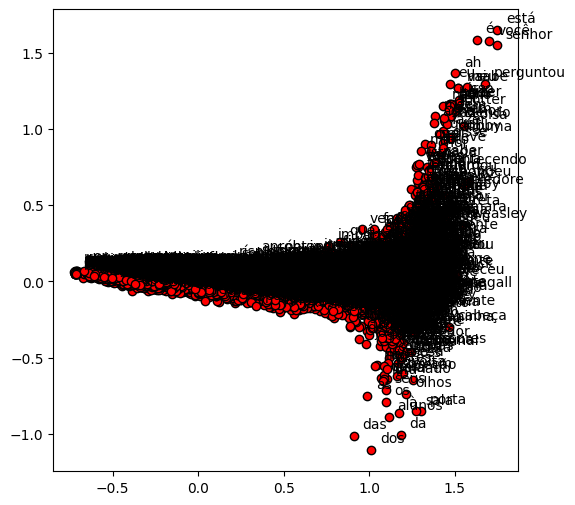

In [29]:
words2 = list(model.wv.key_to_index.keys())  # Extracting words from the vocabulary of the model
display_pca_scatterplot(model.wv, words2)  # Passing word vectors and the list of words


In [34]:
from sklearn.manifold import TSNE

def display_closestwords_tsnescatterplot(model, words):
    arr_dim = model.vector_size
    arr = np.empty((0, arr_dim), dtype='f')

    # get close words
    for word in words:
        wrd_vector = model[word]
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=10, n_iter=5000)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(words, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()


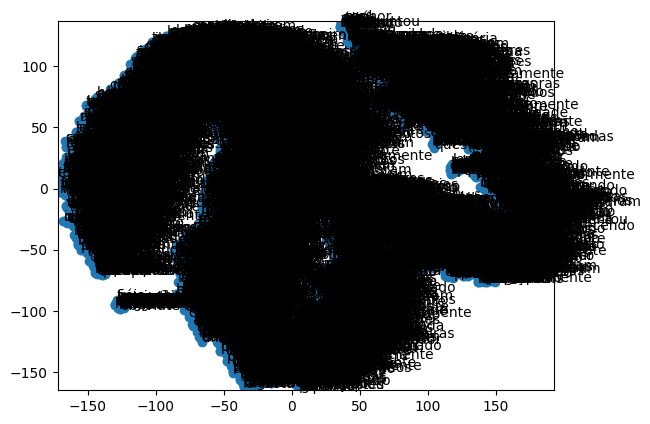

In [35]:
display_closestwords_tsnescatterplot(model.wv, words2)